# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split as tts


In [41]:
data = pd.read_csv('../fetch_california_housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Regression Model Evaluation

In [42]:
X = data.drop('MEDV', axis=1)

y = data.MEDV

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [43]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       train_size=0.8,
                                       random_state = 13)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [44]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg()
linreg.fit(X_train, y_train)

pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)

pred_train[:3], pred_test[:3]

(array([2.04304643, 1.89069665, 2.11258661]),
 array([1.82452679, 1.9903755 , 0.81775367]))

## 3. Calculate and print R-squared for both the training and the testing set.

In [45]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

r2_train, r2_test

(0.6065536679240141, 0.6047072598918707)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [46]:
from sklearn.metrics import mean_squared_error as mse

mse_train = mse(y_train, pred_train)
mse_test = mse(y_test, pred_test)

mse_train , mse_test

(0.5223032378234864, 0.5327327202373382)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [47]:
from sklearn.metrics import mean_absolute_error as mae

mae_train = mae(y_train, pred_train)
mae_test = mae(y_test, pred_test)

mae_train , mae_test

(0.5296620614324276, 0.5414325414349827)

## Classification Model Evaluation

In [48]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [49]:
X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       train_size=0.8,
                                       random_state = 13)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [50]:
from sklearn.linear_model import LogisticRegression as LogReg

logreg = LogReg()

logreg.fit(X_train, y_train)

test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

train_pred[:3] , test_pred[:3]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([2, 0, 0]), array([1, 1, 0]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [51]:
acc_train = logreg.score(X_train, y_train)
acc_test = logreg.score(X_test, y_test) 

acc_train , acc_test

(0.975, 0.9666666666666667)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [52]:
from sklearn.metrics import balanced_accuracy_score as bas

bas_train = bas(y_train, train_pred)
bas_test =  bas(y_test, test_pred)

bas_train , bas_test

(0.9751179751179752, 0.9743589743589745)

## 10. Calculate and print the precision score for both the training and the testing set.

In [54]:
help(prec)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.

    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.

    The best value is 1 and the worst value is 0.

    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.

    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.

    labels : array-like, default=None
        The set of labels to include when ``average != 'binary'``, and thei

In [64]:
from sklearn.metrics import precision_score as prec

prec_train = prec(y_train, train_pred, average='macro')
prec_test = prec(y_test, test_pred, average='macro')

prec_train , prec_test

# micro: sirve para df imbalanceados con clases con amplias diferencias en tamaño
# macro: trata a todas las clases por igual, no le importa el tamaño
# weighted: similar a macro, pero calcula la media de precisión en base al tamaño de la clase
# samples: computa la precisión de forma separada para cada categoría luego coge el mean de todas

(0.9743260590500641, 0.9629629629629629)

## 11. Calculate and print the recall score for both the training and the testing set.

In [74]:
from sklearn.metrics import recall_score as rec

rec_train = rec(y_train , train_pred, average='macro')
rec_test = rec(y_test , test_pred, average='macro')

rec_train , rec_test

(0.9751179751179752, 0.9743589743589745)

## 12. Calculate and print the F1 score for both the training and the testing set.

In [78]:
from sklearn.metrics import f1_score as f1

f1_train = f1(y_train , train_pred, average='macro')
f1_test = f1(y_test , test_pred, average='macro')

f1_train , f1_test

(0.9746184738955823, 0.9670588235294119)

## 13. Generate confusion matrices for both the training and the testing set.

In [87]:
from sklearn.metrics import confusion_matrix as cm

cm(y_train, train_pred) / cm(y_train, train_pred).sum()*100

array([[34.16666667,  0.        ,  0.        ],
       [ 0.        , 33.33333333,  1.66666667],
       [ 0.        ,  0.83333333, 30.        ]])

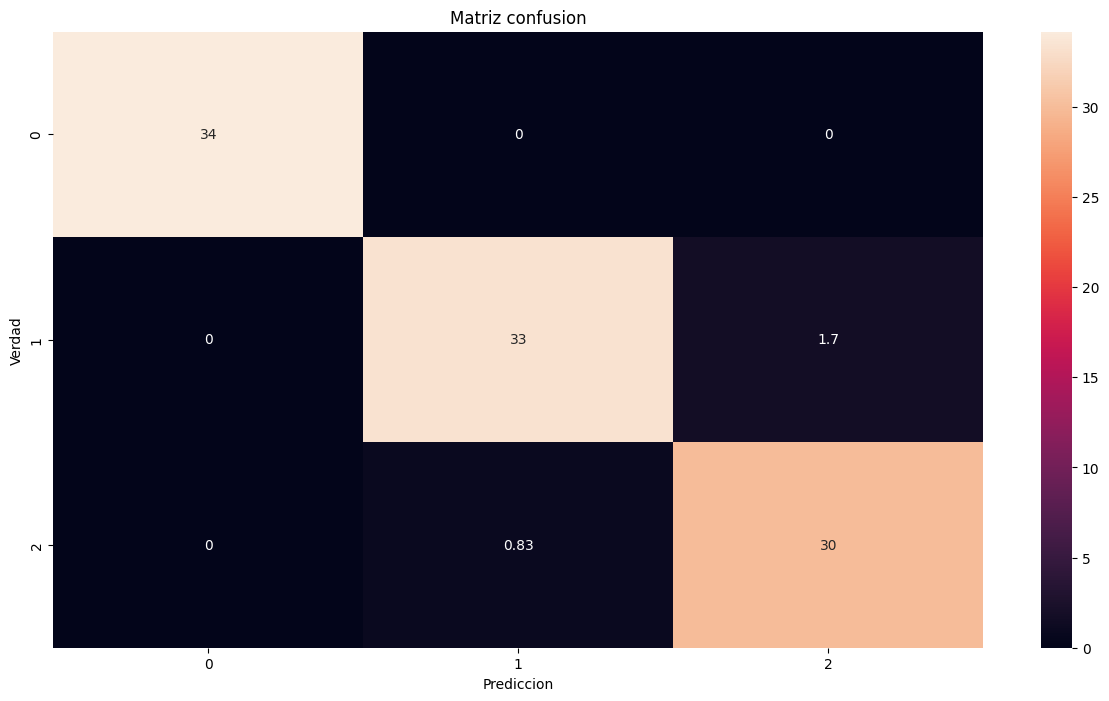

In [86]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, train_pred) / cm(y_train, train_pred).sum()*100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [80]:
cm(y_test, test_pred)

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]])

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.